# Explications des variables:
- OverallQual : Qualité globale des matériaux et de la finition. Souvent très corrélé au prix de vente. (note sur 10, entier)
- GrLivArea : Surface habitable hors sous-sol. Directement liée à la taille de la maison.
- TotalBsmtSF : Superficie totale du sous-sol. Ajoute une grande valeur à la propriété.
- 1stFlrSF : Superficie du rez-de-chaussée. Indique la taille de la maison.
- YearBuilt : Année de construction. Les maisons plus récentes ont tendance à se vendre à un prix plus élevé.
- YearRemodAdd : Année de rénovation. Les rénovations récentes peuvent augmenter le prix.
- GarageCars : Capacité du garage en nombre de voitures. Un élément clé pour de nombreux acheteurs.
- GarageArea : Taille du garage en pieds carrés.
- FullBath : Nombre de salles de bains complètes. Un facteur important pour le confort de la maison.
- TotRmsAbvGrd : Nombre total de pièces au-dessus du sol (hors salles de bains). Plus il y a de pièces, plus le bien est généralement cher.
- KitchenQual : Qualité de la cuisine. Une cuisine de haute qualité ajoute une grande valeur.
- Fireplaces : Nombre de cheminées. Une caractéristique qui peut augmenter l'attrait et la valeur d'une propriété.
- LotArea : Surface totale du terrain. La taille du lot est un facteur important, notamment dans les zones urbaines.
- Neighborhood : Emplacement physique au sein des limites de la ville. L'emplacement a un impact majeur sur les prix de l'immobilier.
- ExterQual : Qualité du matériau extérieur. Un indicateur de la qualité globale de la maison.
- SalePrice : Prix de vente de la maison. C'est la variable cible que nous devons prédire.

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest

# Variable continues & discrètes

Variables discrètes :
- GarageCars
- FullBath
- TotRmsAbvGrd
- KitchenQual
- Fireplaces
- Neighborhood
- ExterQual


Variables continues :
- OverallQual
- GrLivArea
- TotalBsmtSF
- 1stFlrSF
- YearBuilt
- YearRemodAdd
- GarageArea
- LotArea
- SalePrice

In [2]:
df = pd.read_csv("kaggle_train_set.csv")
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,KitchenQual,Fireplaces,LotArea,Neighborhood,ExterQual,SalePrice
0,7,1710,856,856,2003,2003,2,548,2,8,Gd,0,8450,CollgCr,Gd,208500
1,6,1262,1262,1262,1976,1976,2,460,2,6,TA,1,9600,Veenker,TA,181500
2,7,1786,920,920,2001,2002,2,608,2,6,Gd,1,11250,CollgCr,Gd,223500
3,8,1694,1686,1694,2004,2005,2,636,2,7,Gd,1,10084,Somerst,Gd,307000
4,7,1774,952,1022,1931,1950,2,468,2,8,TA,2,6120,OldTown,TA,129900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1180 non-null   int64 
 1   GrLivArea     1180 non-null   int64 
 2   TotalBsmtSF   1180 non-null   int64 
 3   1stFlrSF      1180 non-null   int64 
 4   YearBuilt     1180 non-null   int64 
 5   YearRemodAdd  1180 non-null   int64 
 6   GarageCars    1180 non-null   int64 
 7   GarageArea    1180 non-null   int64 
 8   FullBath      1180 non-null   int64 
 9   TotRmsAbvGrd  1180 non-null   int64 
 10  KitchenQual   1180 non-null   object
 11  Fireplaces    1180 non-null   int64 
 12  LotArea       1180 non-null   int64 
 13  Neighborhood  1180 non-null   object
 14  ExterQual     1180 non-null   object
 15  SalePrice     1180 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 147.6+ KB


In [4]:
df.nunique()

OverallQual      10
GrLivArea       761
TotalBsmtSF     638
1stFlrSF        666
YearBuilt       110
YearRemodAdd     61
GarageCars        5
GarageArea      390
FullBath          4
TotRmsAbvGrd     12
KitchenQual       4
Fireplaces        4
LotArea         882
Neighborhood     25
ExterQual         4
SalePrice       591
dtype: int64

In [5]:
# 1. Séparation des features et de la cible
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# 2. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Facultatif mais conseillé : recréer les DataFrames complets
train_df = X_train.copy()
train_df["SalePrice"] = y_train

test_df = X_test.copy()
test_df["SalePrice"] = y_test

# 0. Analyse de SalePrice
SalePrice : Prix de vente de la maison. C'est la variable cible que nous devons prédire.

- 50% des biens immobiliers ont une valeur comprisent entre 128 800 € et 212 000 €.
- La moyenne est de 178 822.17 €
- La médiane est de 161 250 €

In [6]:
train_df["SalePrice"].describe().round(2)

count       944.00
mean     180989.79
std       80364.42
min       34900.00
25%      129000.00
50%      162500.00
75%      213625.00
max      755000.00
Name: SalePrice, dtype: float64

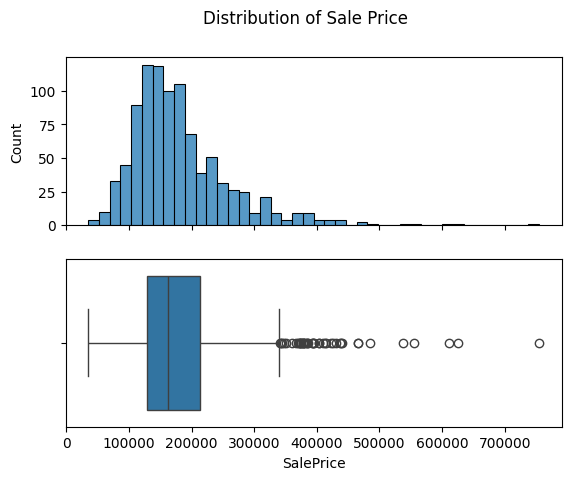

In [7]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=train_df, x="SalePrice", ax=ax[0])
sns.boxplot(data=train_df, x="SalePrice", ax=ax[1])
plt.suptitle("Distribution of Sale Price")
plt.show()

# 1. Analyse de OverallQual

OverallQual : Qualité globale des matériaux et de la finition. Souvent très corrélé au prix de vente. (note sur 10, entier)

- 50% des biens immobiliers ont une note comprise entre 5/10 et 7/10
- La médiane des notes est de 6/10
- Il y a une forte corrélation entre le prix et le score de qualité global

In [8]:
train_df["OverallQual"].describe()

count    944.000000
mean       6.127119
std        1.381880
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: OverallQual, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable OverallQual dans ce jeu de donnée')

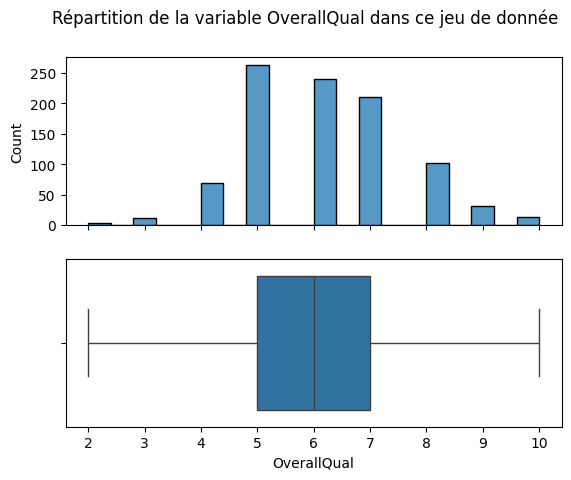

In [9]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(data=train_df, x="OverallQual", ax=ax[0])
sns.boxplot(data=train_df, x="OverallQual", ax=ax[1])
plt.suptitle("Répartition de la variable OverallQual dans ce jeu de donnée")

In [10]:
train_df.groupby("OverallQual")["SalePrice"].describe()

,count,mean,std,min,25%,50%,75%,max
OverallQual,,,,,,,,
2,3.0,51770.333333,14254.200796,35311.0,47655.50,60000.0,60000.00,60000.0
3,11.0,86279.545455,28257.036332,37900.0,74500.00,85000.0,93200.00,139600.0
4,69.0,103083.405797,26192.036868,34900.0,85500.00,104900.0,120500.00,161500.0
5,263.0,132322.220532,26328.705820,60000.0,116500.00,132500.0,146200.00,228950.0
6,240.0,160782.745833,37315.987345,76000.0,136800.00,160000.0,181000.00,277000.0
7,210.0,208797.614286,45277.572244,82500.0,179555.00,200070.5,231875.00,375000.0
8,102.0,274924.813725,67030.857456,147000.0,235032.00,267000.0,305294.25,538000.0
9,32.0,358160.875000,70360.705689,239000.0,317295.75,355000.0,381250.00,611657.0
10,14.0,421260.071429,157268.836416,160000.0,349375.00,414430.5,466125.00,755000.0


<Axes: xlabel='OverallQual'>

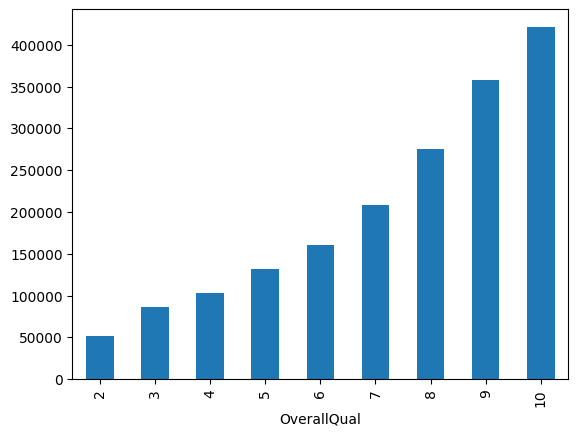

In [11]:
train_df.groupby("OverallQual")["SalePrice"].mean().sort_index().plot(kind="bar")

# Test de ANOVA

In [12]:
train_df.groupby("OverallQual")["SalePrice"].mean().round(2)

OverallQual
2      51770.33
3      86279.55
4     103083.41
5     132322.22
6     160782.75
7     208797.61
8     274924.81
9     358160.88
10    421260.07
Name: SalePrice, dtype: float64

In [13]:
print("Ho : 'La moyenne des prix de vente est la même quel que soit le niveau de qualité.'")

alpha = 0.02
p_value = f_oneway(*train_df.groupby("OverallQual")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La moyenne des prix de vente est la même quel que soit le niveau de qualité.'
On rejette Ho
p_value = 1.196885878117455e-227


# 2. Analyse de GarageCars
GarageCars : Capacité du garage en nombre de voitures. Un élément clé pour de nombreux acheteurs.

- Les biens immobiliers avec 2 places de garage sont 654
- Les biens immobiliers avec 1 places de garage sont 312
- Les biens immobiliers avec 3 places de garage sont 144
- Les biens immobiliers avec 0 places de garage sont 66
- Les biens immobiliers avec 4 places de garage sont 4

- Le prix de vente augmente avec le nombres de places de voiture dans le garage, attention cependant<br>
les données pour 4 places sont trop peu nombreuses pour conclure de manière fiable → biais possible.

In [14]:
train_df["GarageCars"].value_counts().sort_index()

GarageCars
0     51
1    251
2    517
3    122
4      3
Name: count, dtype: int64

<Axes: xlabel='GarageCars'>

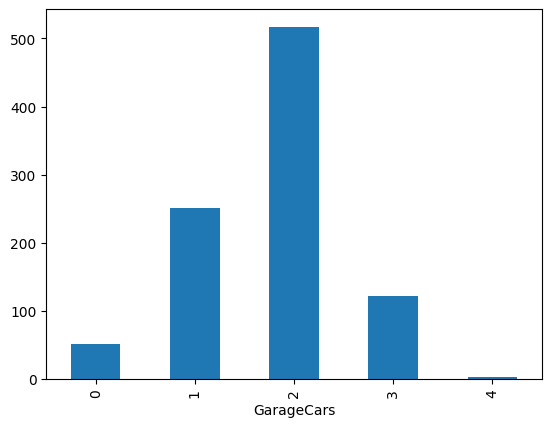

In [15]:
train_df["GarageCars"].value_counts().sort_index().plot(kind="bar")

In [16]:
train_df.groupby("GarageCars")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
GarageCars,,,,,,,,
0,51.0,101229.41,33309.88,34900.0,81500.0,94000.0,115500.0,200500.0
1,251.0,126355.15,30066.66,35311.0,109750.0,127000.0,140600.0,266500.0
2,517.0,185221.84,51670.80,68400.0,150750.0,178000.0,213250.0,430000.0
3,122.0,308373.39,105915.10,87000.0,244700.0,294285.0,372475.5,755000.0
4,3.0,198426.33,71813.96,123000.0,164650.0,206300.0,236139.5,265979.0


<Axes: xlabel='GarageCars'>

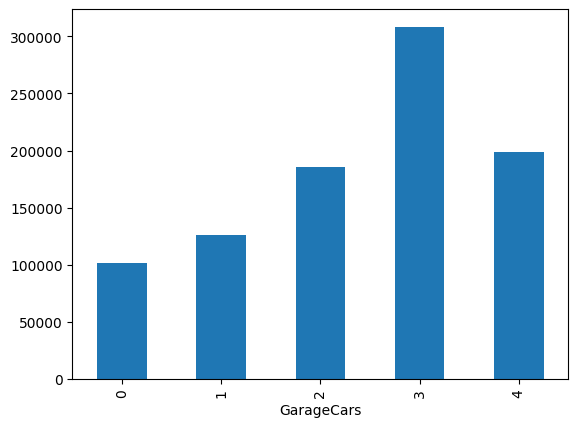

In [17]:
train_df.groupby("GarageCars")["SalePrice"].mean().sort_index().plot(kind="bar")

# ANOVA

In [18]:
train_df.groupby("GarageCars")["SalePrice"].mean().round(2)

GarageCars
0    101229.41
1    126355.15
2    185221.84
3    308373.39
4    198426.33
Name: SalePrice, dtype: float64

In [19]:
print("Ho : 'Le nombre de voitures dans le garage n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = f_oneway(*train_df.groupby("GarageCars")["SalePrice"].apply(list)).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'Le nombre de voitures dans le garage n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 6.463796096623562e-141


# 3. Analyse de FullBath
FullBath : Nombre de salles de bains complètes. Un facteur important pour le confort de la maison.

- Les biens avec aucune et 3 salle de bains sont sous-représenté dans ce dataset
- Les biens avec 1 salle de bain sont 539
- Les biens avec 2 salles de bain sont 609
- Le nombre de salle de bain à un impact sur le prix de vente,<br>
attention les biens avec 0 sdb ne sont que 7 dont peu représentatif. 

In [20]:
train_df["FullBath"].value_counts().sort_index()

FullBath
0      6
1    426
2    493
3     19
Name: count, dtype: int64

<Axes: xlabel='FullBath'>

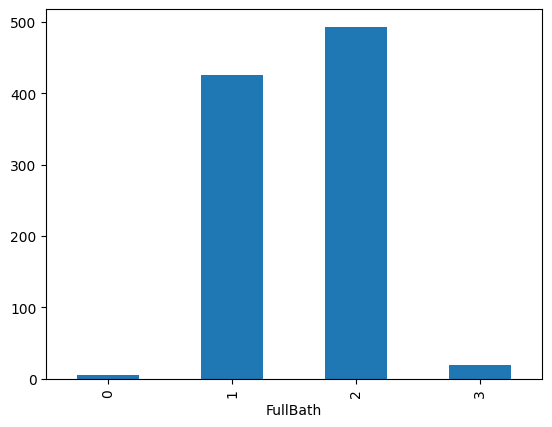

In [21]:
train_df["FullBath"].value_counts().sort_index().plot(kind="bar")

In [22]:
train_df.groupby("FullBath")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
FullBath,,,,,,,,
0,6.0,193918.67,119096.77,35311.0,144250.0,169600.5,243550.25,385000.0
1,426.0,134572.25,45269.24,34900.0,110000.0,130500.0,149800.00,423000.0
2,493.0,214422.87,73455.97,64500.0,171000.0,195000.0,248328.00,611657.0
3,19.0,350136.68,163331.62,171000.0,200562.0,320000.0,434390.00,755000.0


<Axes: xlabel='FullBath'>

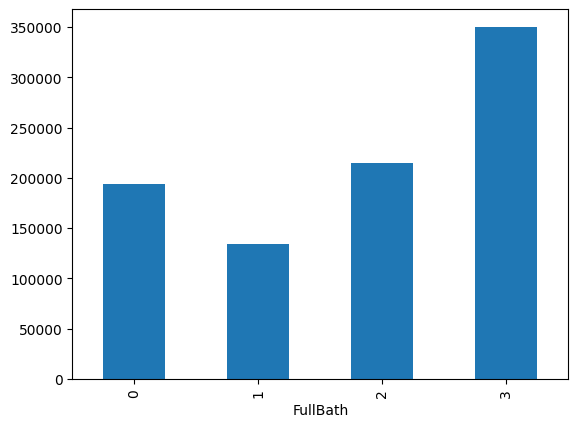

In [23]:
train_df.groupby("FullBath")["SalePrice"].mean().plot(kind="bar")

# Test de ANOVA

In [24]:
train_df.groupby("FullBath")["SalePrice"].mean().round(2)

FullBath
0    193918.67
1    134572.25
2    214422.87
3    350136.68
Name: SalePrice, dtype: float64

In [25]:
print("Ho : 'Le nombre de salle de bain n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = f_oneway(*train_df.groupby("FullBath")["SalePrice"].apply(list)).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'Le nombre de salle de bain n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 1.653675956097133e-81


# 4. Analyse de TotRmsAbvGrd
TotRmsAbvGrd : Nombre total de pièces au-dessus du sol (hors salles de bains). Plus il y a de pièces, plus le bien est généralement cher.

- Le nombre total de pièces au-dessus du sol varie de 2 à 14 dans ce jeu de données.
- La moyenne est de 6.5 avec un écart-type de 1.63
- La médiane est de 6 pièces au-dessus du sol
- 50% des biens immobiliers ont entre 5 et 7 pièces au-dessus du sol.
- Le nombre de pièces au-dessus du sol à un impact sur le prix

In [26]:
train_df["TotRmsAbvGrd"].value_counts().sort_index()

TotRmsAbvGrd
3       8
4      69
5     175
6     270
7     210
8     114
9      49
10     27
11     13
12      8
14      1
Name: count, dtype: int64

In [27]:
train_df["TotRmsAbvGrd"].describe()

count    944.000000
mean       6.505297
std        1.627564
min        3.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       14.000000
Name: TotRmsAbvGrd, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable TotRmsAbvGrd dans ce jeu de donnée')

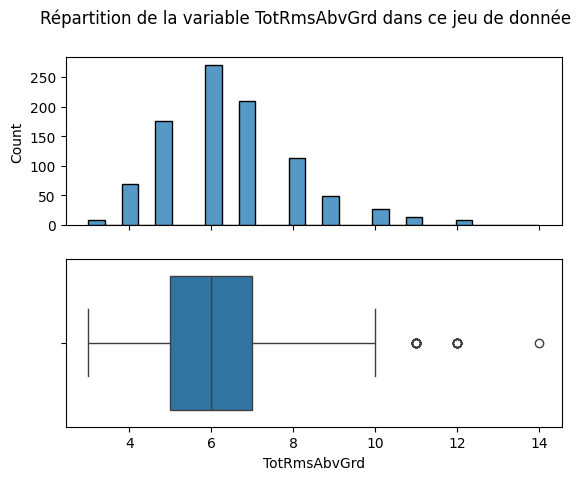

In [28]:
fig, ax = plt.subplots(2 ,1, sharex=True)
sns.histplot(data=train_df, x="TotRmsAbvGrd", ax=ax[0])
sns.boxplot(data=train_df, x="TotRmsAbvGrd", ax=ax[1])
plt.suptitle("Répartition de la variable TotRmsAbvGrd dans ce jeu de donnée")

In [29]:
train_df.groupby("TotRmsAbvGrd")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
TotRmsAbvGrd,,,,,,,,
3,8.0,103412.50,35164.57,60000.0,78875.0,90500.0,138625.0,149300.0
4,69.0,122838.45,44135.51,34900.0,91000.0,120000.0,144000.0,260000.0
5,175.0,138617.18,46296.84,55000.0,110750.0,128900.0,156000.0,385000.0
6,270.0,161367.13,50801.42,37900.0,130875.0,155000.0,185375.0,374000.0
7,210.0,199474.46,69402.91,79900.0,155000.0,184000.0,235096.0,465000.0
8,114.0,220108.42,78576.06,81000.0,163992.5,206650.0,265343.0,466500.0
9,49.0,252266.61,80973.72,98000.0,200624.0,250000.0,290000.0,426000.0
10,27.0,306669.70,161035.14,118500.0,160000.0,285000.0,395500.0,755000.0
11,13.0,312937.23,130757.47,107500.0,242000.0,303477.0,345000.0,611657.0


<Axes: xlabel='TotRmsAbvGrd'>

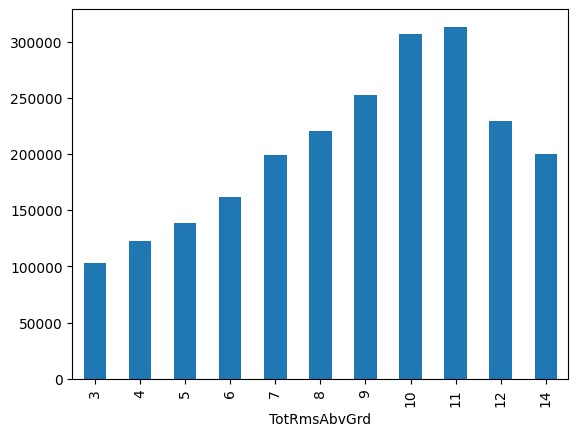

In [30]:
train_df.groupby("TotRmsAbvGrd")["SalePrice"].mean().plot(kind="bar")

# ANOVA

In [31]:
train_df.groupby("TotRmsAbvGrd")["SalePrice"].mean().round(2)

TotRmsAbvGrd
3     103412.50
4     122838.45
5     138617.18
6     161367.13
7     199474.46
8     220108.42
9     252266.61
10    306669.70
11    312937.23
12    229094.12
14    200000.00
Name: SalePrice, dtype: float64

In [32]:
print("Ho : 'Le nombre de pièces au-dessus du sol n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = f_oneway(*train_df.groupby("TotRmsAbvGrd")["SalePrice"].apply(list)).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'Le nombre de pièces au-dessus du sol n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 1.3089909683796956e-67


# 5. Analyse de KitchenQual
KitchenQual : Qualité de la cuisine. Une cuisine de haute qualité ajoute une grande valeur.

- Il y a 34 cuisines de qualité Fa
- Il y a 600 cuisines de qualité TA
- Il y a 462 cuisines de qualité Gd
- Il y a 84 cuisines de qualité Ex
- Les qualité Fa et Ex sont peu présente dans ce dataset
- La qualité de la cuisine a un impact sur le prix de ventes



Ex = Excellent

Fa = Fair

Gd = Good

TA = Typical/Average

In [33]:
qual_order = ["Fa", "TA", "Gd", "Ex"]

In [34]:
train_df["KitchenQual"].value_counts().loc[qual_order]


KitchenQual
Fa     21
TA    483
Gd    373
Ex     67
Name: count, dtype: int64

<Axes: xlabel='KitchenQual'>

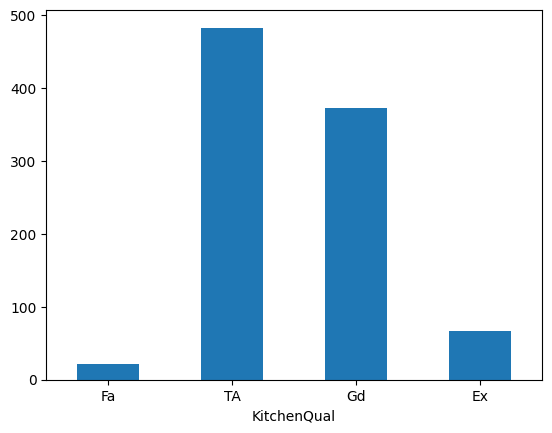

In [35]:
train_df["KitchenQual"].value_counts().loc[qual_order].plot(kind="bar", rot=0)

In [36]:
train_df.groupby("KitchenQual")["SalePrice"].describe().round(2).loc[qual_order]

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Fa,21.0,106200.00,38478.76,52500.0,82000.0,101000.0,135000.0,200000.0
TA,483.0,139474.11,39884.99,34900.0,115000.0,137000.0,160000.0,375000.0
Gd,373.0,212037.62,66676.73,79000.0,170000.0,200000.0,244000.0,625000.0
Ex,67.0,330867.69,111840.42,86000.0,265016.0,318061.0,390341.0,755000.0


<Axes: xlabel='KitchenQual'>

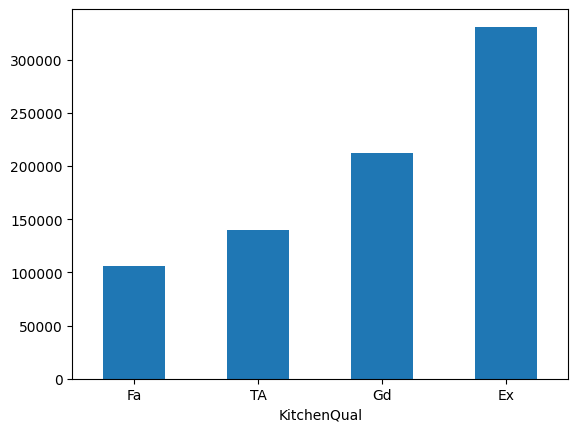

In [37]:
train_df.groupby("KitchenQual")["SalePrice"].mean().loc[qual_order].plot(kind="bar", rot=0)

# ANOVA

In [38]:
train_df.groupby("KitchenQual")["SalePrice"].mean().loc[qual_order].round(2)

KitchenQual
Fa    106200.00
TA    139474.11
Gd    212037.62
Ex    330867.69
Name: SalePrice, dtype: float64

In [39]:
print("Ho : 'La qualité de la cuisine n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = f_oneway(*train_df.groupby("KitchenQual")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")

print(f"p_value = {p_value}")

Ho : 'La qualité de la cuisine n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 4.3465151333201597e-126


# 6. Analyse de Fireplaces
Fireplaces : Nombre de cheminées. Une caractéristique qui peut augmenter l'attrait et la valeur d'une propriété.

- Les biens immobiliers n'ayant aucune cheminée sont au nombre de 566
- Les biens immobiliers ayant 1 cheminée sont au nombre de 513
- Les biens immobiliers ayant 2 cheminée sont au nombre de 97
- Les biens immobiliers ayant 3 cheminée sont au nombre de 4
- Les biens immobiliers avec 2 et 3 cheminées sont peu représenté dans ce dataset
- Le nombre de cheminée a un impact sur le prix de vente


In [40]:
train_df["Fireplaces"].value_counts().sort_index()

Fireplaces
0    444
1    417
2     80
3      3
Name: count, dtype: int64

<Axes: xlabel='Fireplaces'>

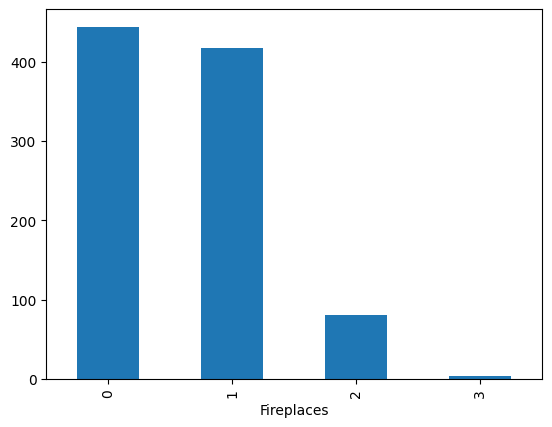

In [41]:
train_df["Fireplaces"].value_counts().sort_index().plot(kind="bar")

In [42]:
train_df.groupby("Fireplaces")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Fireplaces,,,,,,,,
0,444.0,140392.38,44820.41,34900.0,110000.0,135000.0,164125.0,342643.0
1,417.0,211083.93,79408.18,60000.0,156000.0,189950.0,255000.0,625000.0
2,80.0,247351.81,117079.90,110000.0,163750.0,218250.0,311875.0,755000.0
3,3.0,236666.67,107857.93,160000.0,175000.0,190000.0,275000.0,360000.0


<Axes: xlabel='Fireplaces'>

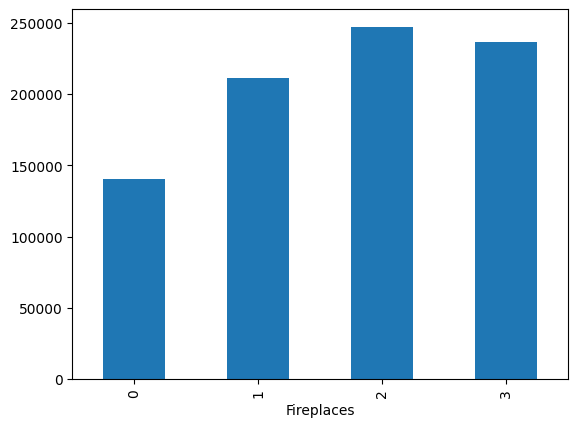

In [43]:
train_df.groupby("Fireplaces")["SalePrice"].mean().plot(kind="bar")

# ANOVA

In [44]:
train_df.groupby("Fireplaces")["SalePrice"].mean().round(2)

Fireplaces
0    140392.38
1    211083.93
2    247351.81
3    236666.67
Name: SalePrice, dtype: float64

In [45]:
print("Ho : 'Le nombre de cheminées n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = f_oneway(*train_df.groupby("Fireplaces")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'Le nombre de cheminées n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 4.469485150941215e-56


# 7. Analyse de Neighborhood
Neighborhood : Emplacement physique au sein des limites de la ville. L'emplacement a un impact majeur sur les prix de l'immobilier.

- Il y a 25 emplacements différents dans ce dataset
- Il y a aussi des désiquilibres
- L'emplacement joue un role dans la valeurs d'un bien immobilier
- On pourra envisager un encoder Ordinal, et peut être même regrouper des quartiers ensemble

In [46]:
train_df["Neighborhood"].value_counts().sort_index()

Neighborhood
Blmngtn     14
Blueste      2
BrDale      13
BrkSide     34
ClearCr     19
CollgCr     95
Crawfor     34
Edwards     60
Gilbert     52
IDOTRR      19
MeadowV      9
Mitchel     29
NAmes      158
NPkVill      5
NWAmes      43
NoRidge     28
NridgHt     49
OldTown     72
SWISU       17
Sawyer      47
SawyerW     42
Somerst     58
StoneBr     16
Timber      21
Veenker      8
Name: count, dtype: int64

<Axes: xlabel='Neighborhood'>

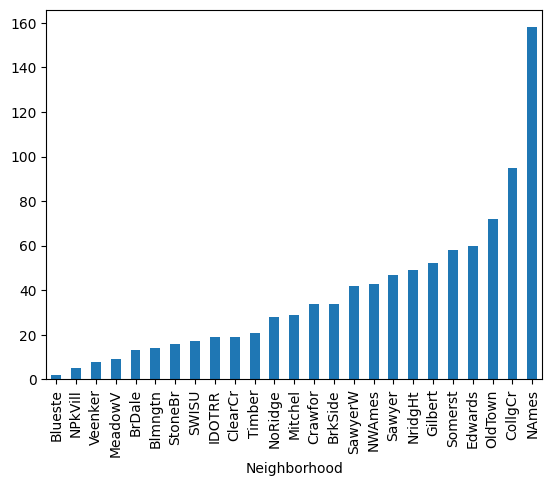

In [47]:
train_df["Neighborhood"].value_counts().sort_values().plot(kind="bar", rot=90)

In [48]:
train_df.groupby("Neighborhood")["SalePrice"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,14.0,189446.00,26185.24,159895.0,172875.0,184870.0,193775.75,246578.0
Blueste,2.0,137500.00,19091.88,124000.0,130750.0,137500.0,144250.00,151000.0
BrDale,13.0,104953.85,14860.83,83000.0,91500.0,106000.0,118000.00,125000.0
BrkSide,34.0,121729.41,38642.26,60000.0,92250.0,119500.0,136375.00,214500.0
ClearCr,19.0,215178.95,44676.46,130000.0,190000.0,200500.0,240750.00,328000.0
CollgCr,95.0,197167.09,46243.17,112500.0,158875.0,195400.0,226500.00,313000.0
Crawfor,34.0,211353.65,63055.34,90350.0,164250.0,208812.0,234750.00,381000.0
Edwards,60.0,123494.50,38800.11,58500.0,99425.0,118750.0,138025.00,274970.0
Gilbert,52.0,194515.37,39030.02,145000.0,174000.0,182167.0,199925.00,377500.0


<Axes: xlabel='Neighborhood'>

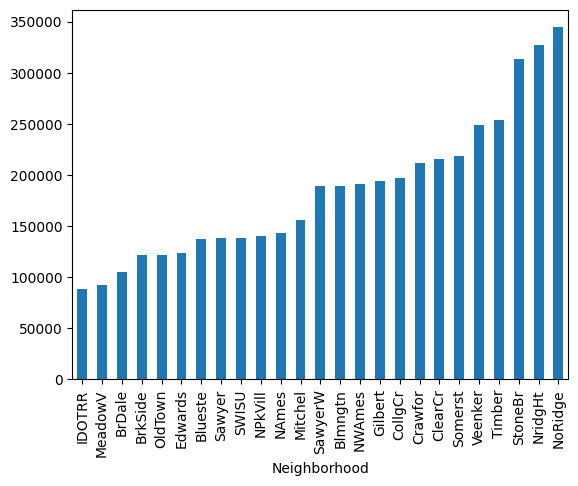

In [49]:
train_df.groupby("Neighborhood")["SalePrice"].mean().sort_values().plot(kind="bar")

# ANOVA

In [50]:
train_df.groupby("Neighborhood")["SalePrice"].mean().sort_values().round(2)

Neighborhood
IDOTRR      88594.05
MeadowV     92711.11
BrDale     104953.85
BrkSide    121729.41
OldTown    122047.29
Edwards    123494.50
Blueste    137500.00
Sawyer     138277.30
SWISU      138466.71
NPkVill    140550.00
NAmes      143043.63
Mitchel    156373.66
SawyerW    188883.26
Blmngtn    189446.00
NWAmes     191214.07
Gilbert    194515.37
CollgCr    197167.09
Crawfor    211353.65
ClearCr    215178.95
Somerst    219003.48
Veenker    248562.50
Timber     254259.05
StoneBr    313758.62
NridgHt    327467.84
NoRidge    344503.86
Name: SalePrice, dtype: float64

In [51]:
print("Ho : 'Le quartier n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = f_oneway(*train_df.groupby("Neighborhood")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'Le quartier n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 9.697149734467873e-165


# 8. Analyse de ExterQual
ExterQual : Qualité du matériau extérieur. Un indicateur de la qualité globale de la maison.

Ex = Excellent

Fa = Fair

Gd = Good

TA = Typical/Average

- FA : 11 biens immobiliers
- TA : 742 biens immobiliers
- Gd : 383 biens immobiliers
- Ex : 44 biens immobiliers
- On constate un désiquilibre avec FA/Ex vs TA/Gd
- La qualité des matériaux extérieur à un impact sur le prix

In [52]:
qualExter_order = ["Fa", "TA", "Gd", "Ex"]

In [53]:
train_df["ExterQual"].value_counts().loc[qualExter_order]

ExterQual
Fa      7
TA    583
Gd    318
Ex     36
Name: count, dtype: int64

<Axes: xlabel='ExterQual'>

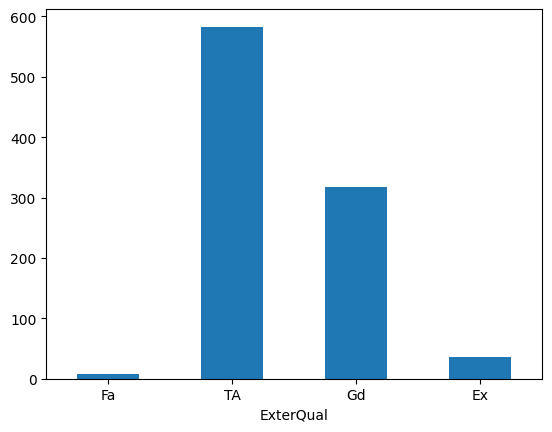

In [54]:
train_df["ExterQual"].value_counts().loc[qualExter_order].plot(kind="bar", rot=0)

In [55]:
train_df.groupby("ExterQual")["SalePrice"].describe().round(2).loc[qualExter_order]

,count,mean,std,min,25%,50%,75%,max
ExterQual,,,,,,,,
Fa,7.0,105928.57,46175.78,60000.0,82250.0,85000.0,116000.0,200000.0
TA,583.0,142669.72,43474.79,34900.0,116475.0,139000.0,165000.0,381000.0
Gd,318.0,230691.34,66847.34,109500.0,184925.0,219355.0,264783.0,625000.0
Ex,36.0,377126.94,118921.85,160000.0,311404.0,378000.0,428788.5,755000.0


<Axes: xlabel='ExterQual'>

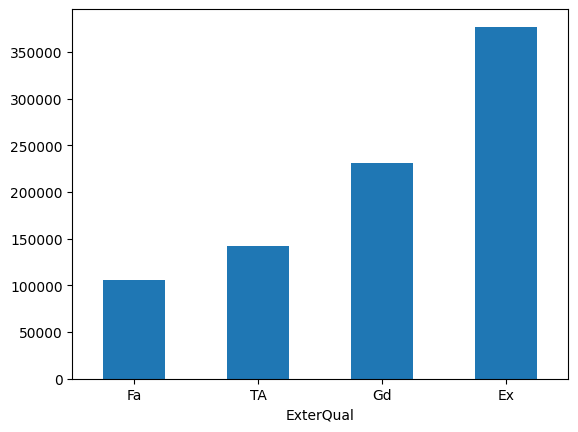

In [56]:
train_df.groupby("ExterQual")["SalePrice"].mean().round(2).loc[qualExter_order].plot(kind="bar", rot=0)

# ANOVA

In [57]:
train_df.groupby("ExterQual")["SalePrice"].mean().round(2)

ExterQual
Ex    377126.94
Fa    105928.57
Gd    230691.34
TA    142669.72
Name: SalePrice, dtype: float64

In [58]:
print("Ho : 'La qualité des matériaux extérieur n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = f_oneway(*train_df.groupby("ExterQual")["SalePrice"].apply(list)).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La qualité des matériaux extérieur n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 2.2659605848463564e-142


# 9. Analyse de GrLivArea
GrLivArea : Surface habitable hors sous-sol. Directement liée à la taille de la maison.

- Certains quartiers sont sous représenté dans ce dataset, il faudra surement en regrouper quelques un ensemble
- Les maisons entre 1118 et 1779 m² représente 50% du dataset
- Avec une moyenne de 1508 m² avec un écart type de 534.63m²
- La médiane est de 1441.5m²
- On observe une tendance linéaire entre le prix et la surface
- La surface habitable est corrélé au prix de vente

In [59]:
train_df["GrLivArea"].describe().round(2)

count     944.00
mean     1517.72
std       537.98
min       438.00
25%      1127.50
50%      1452.50
75%      1795.25
max      5642.00
Name: GrLivArea, dtype: float64

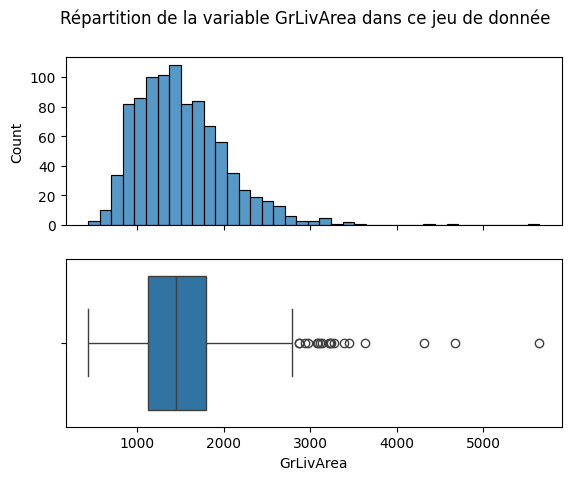

In [60]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=train_df, x="GrLivArea", ax=ax[0])
sns.boxplot(data=train_df, x="GrLivArea", ax=ax[1])
plt.suptitle("Répartition de la variable GrLivArea dans ce jeu de donnée")
plt.show()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

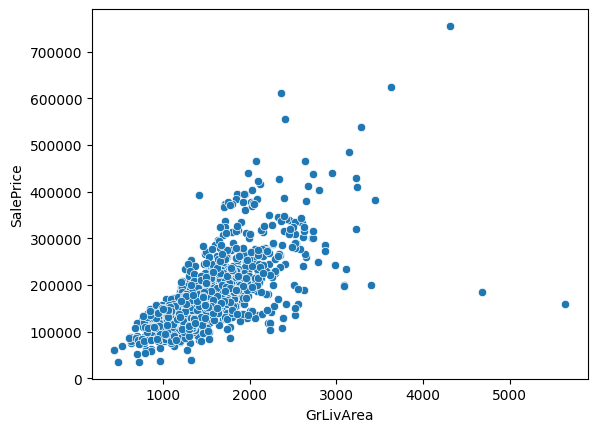

In [61]:
sns.scatterplot(data=train_df, x="GrLivArea", y="SalePrice")

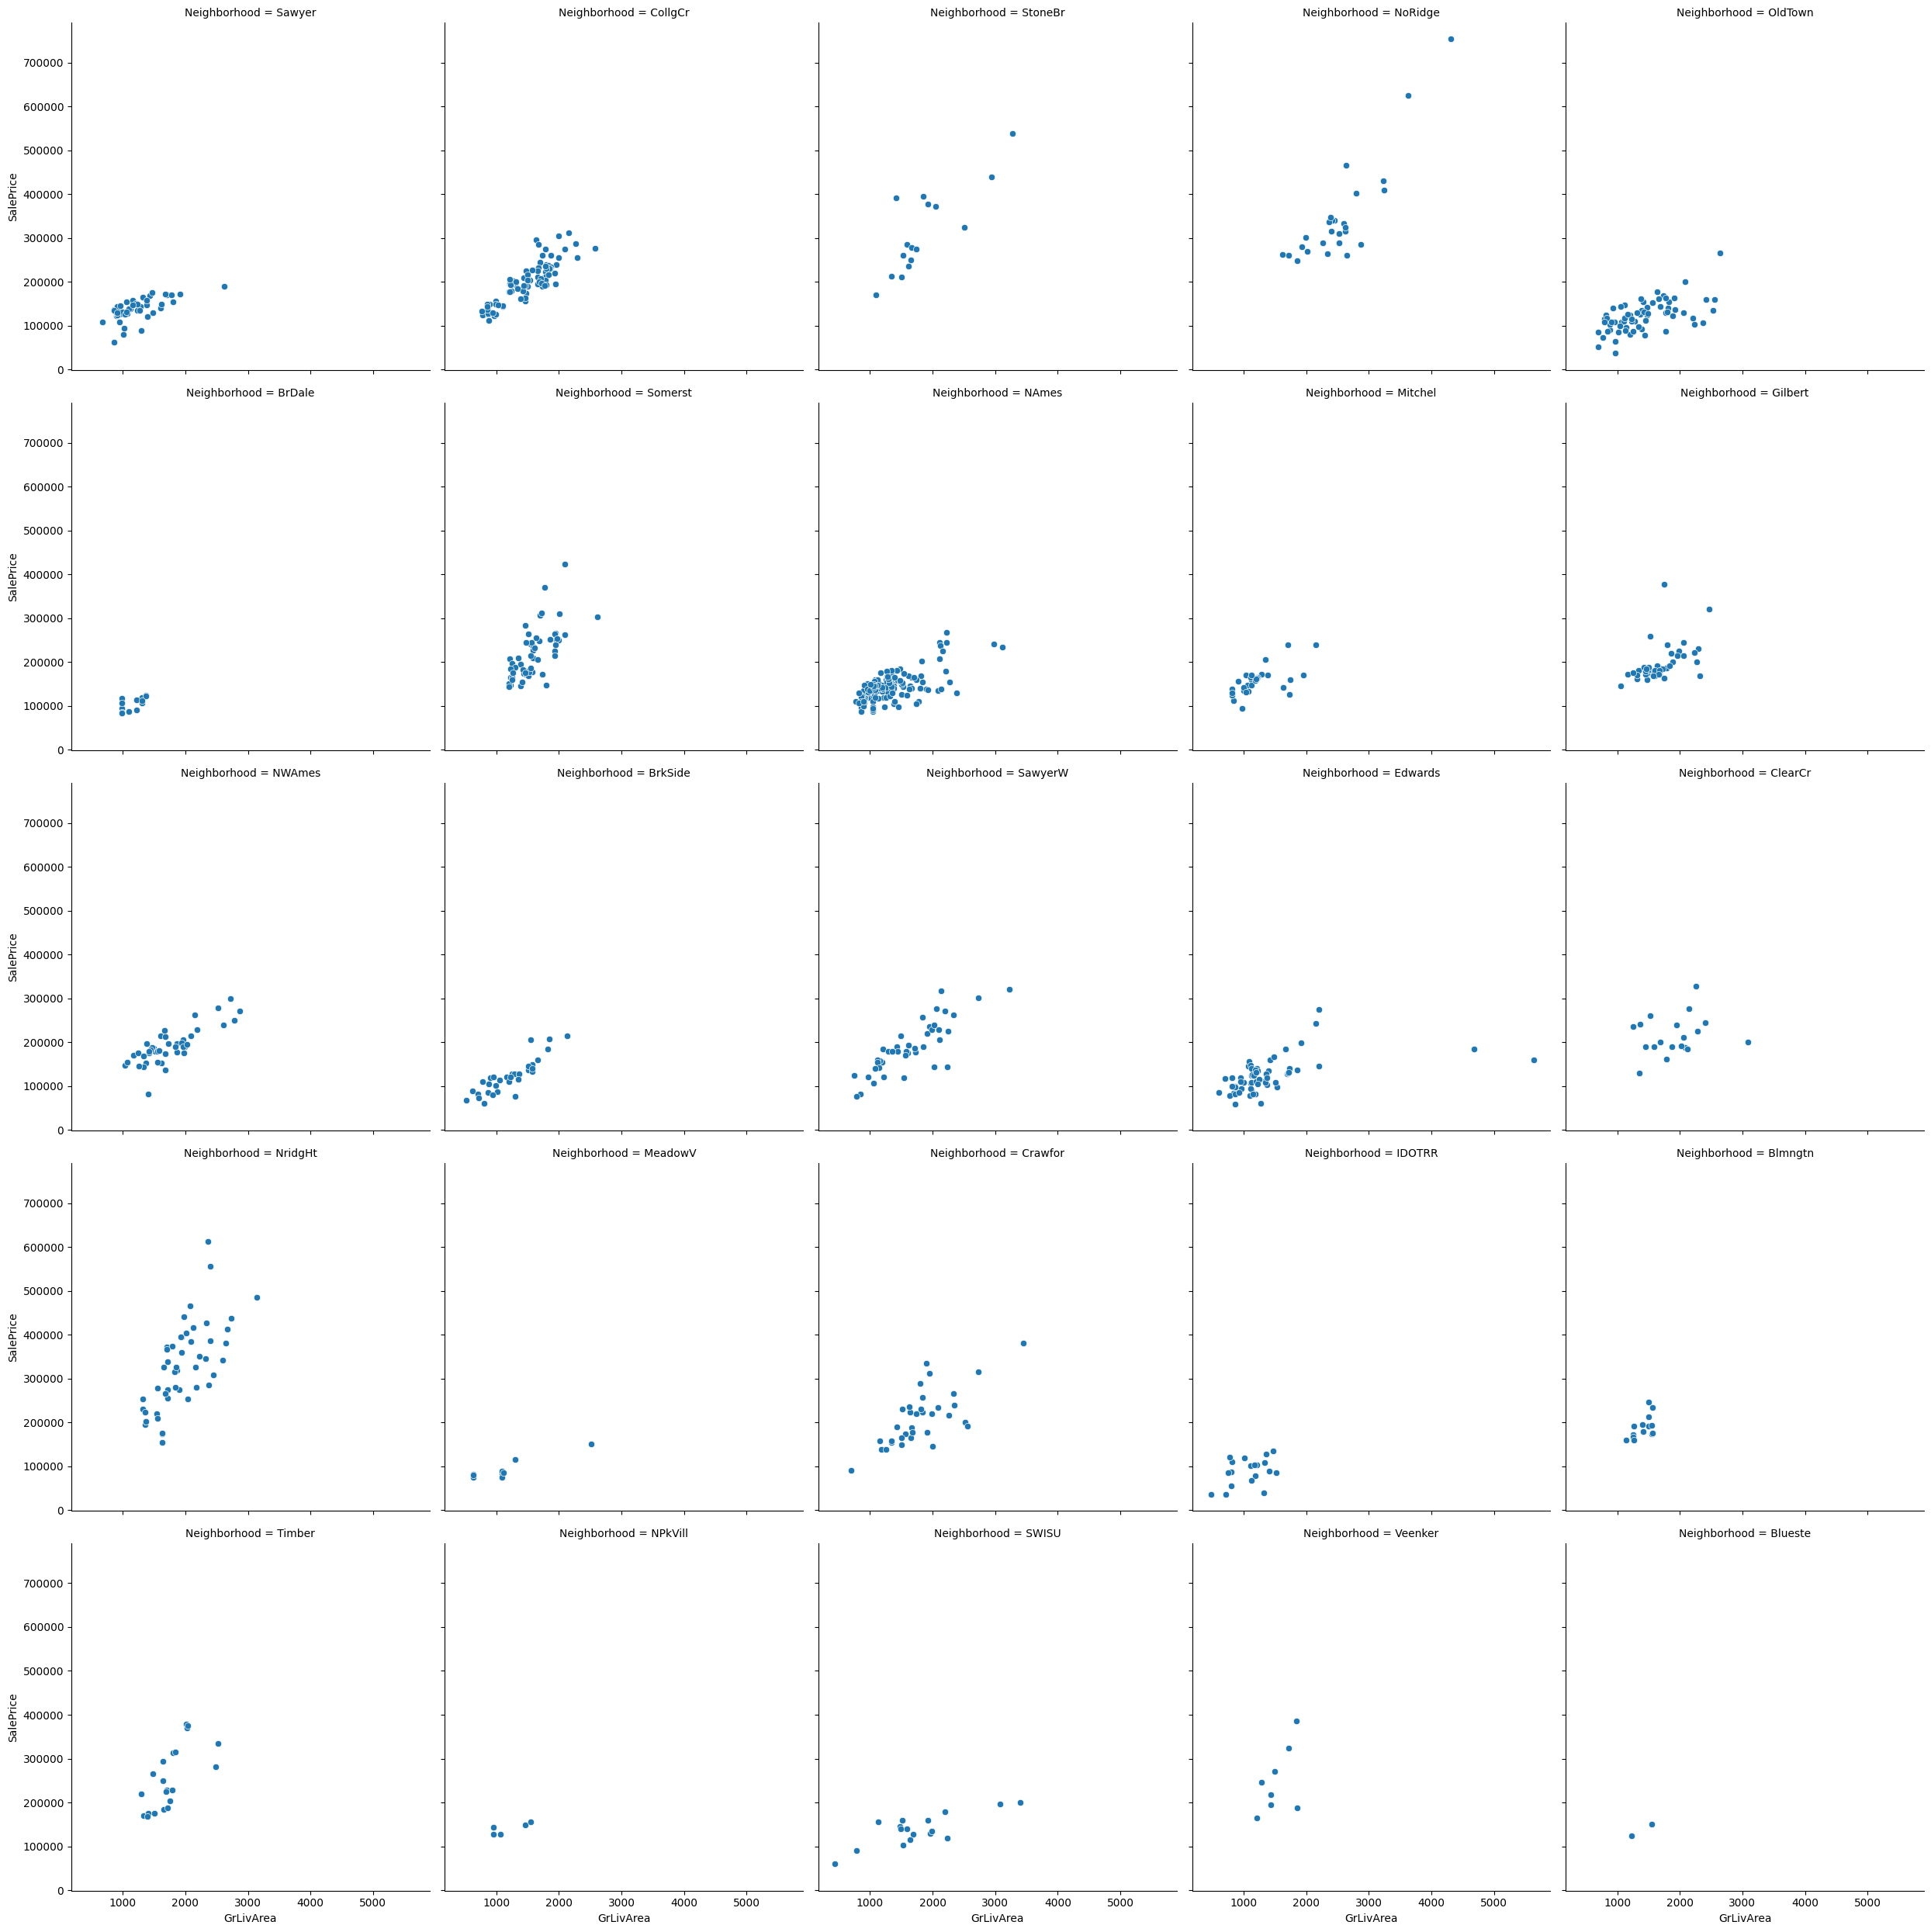

In [62]:
sns.relplot(data=train_df, x="GrLivArea", y="SalePrice", col="Neighborhood", col_wrap=5)

# PearsonR

In [63]:
print("Ho : 'La surface habitable n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = pearsonr(train_df["GrLivArea"], train_df["SalePrice"]).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La surface habitable n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 3.1862583904712225e-136


# 10. Analyse de TotalBsmtSF
TotalBsmtSF : Superficie totale du sous-sol. Ajoute une grande valeur à la propriété.

- 50% des propriété ont un sous sol d'une superficie comprisent entre 793 et 1309 m²
- Une propriété un sous sol de 6110 m², très éloigné de toutes les autres
- La moyenne est de 1058.87m² avec un écart type de 448m²
- La médiane est de 993.50m²
- La surface du sous-sol à un impact sur le prix d'une propriété

In [64]:
train_df["TotalBsmtSF"].describe().round(2)

count     944.00
mean     1067.70
std       459.57
min         0.00
25%       792.75
50%      1004.00
75%      1314.50
max      6110.00
Name: TotalBsmtSF, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable TotalBsmtSF dans ce jeu de donnée')

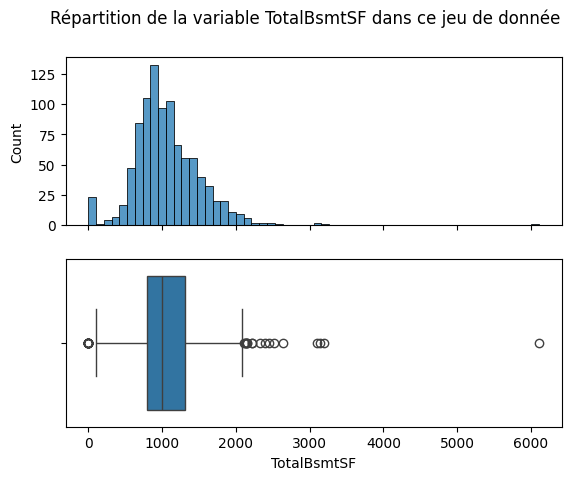

In [65]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=train_df, x="TotalBsmtSF", ax=ax[0])
sns.boxplot(data=train_df, x="TotalBsmtSF", ax=ax[1])
plt.suptitle("Répartition de la variable TotalBsmtSF dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

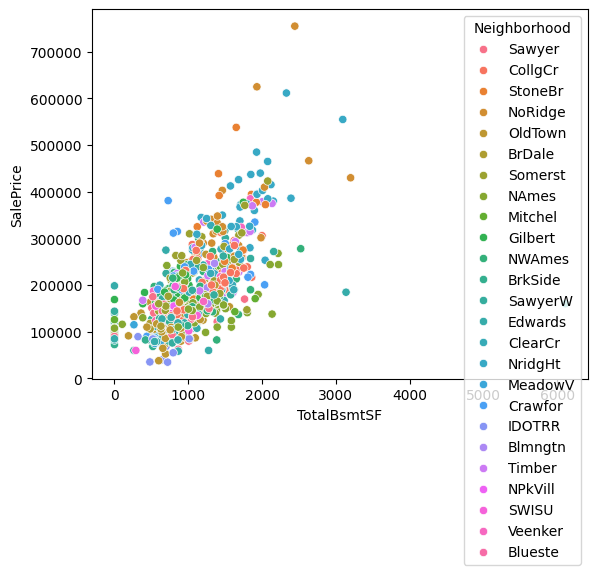

In [66]:
sns.scatterplot(data=train_df, x="TotalBsmtSF", y="SalePrice", hue="Neighborhood")

In [67]:
print("Ho : 'La surface totale du sous-sol n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = pearsonr(train_df["TotalBsmtSF"], train_df["SalePrice"]).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La surface totale du sous-sol n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 6.236772014210023e-101


# 11. Analyse de 1stFlrSF
1stFlrSF : Superficie du rez-de-chaussée. Indique la taille de la maison.

- 50% des maisons ont une superficie du rez-de-chaussée entre 879.75 et 1392 m²
- La médiane est de 1088m²
- La moyenne est de 1163.18m² avec un écart type de 395.10m²
- Il y a une maison isolé du reste du dataset avec une superficie de rdc de 4692 m²
- La surface du RDC est corrélé au prix des maisons


In [68]:
train_df["1stFlrSF"].describe().round(2)

count     944.00
mean     1165.78
std       405.38
min       438.00
25%       873.50
50%      1088.00
75%      1391.00
max      4692.00
Name: 1stFlrSF, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable 1stFlrSF dans ce jeu de donnée')

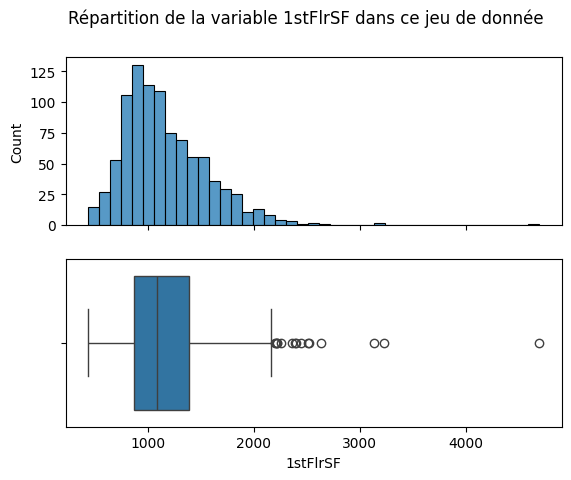

In [69]:
fig , ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=train_df, x="1stFlrSF", ax=ax[0])
sns.boxplot(data=train_df, x="1stFlrSF", ax=ax[1])
plt.suptitle("Répartition de la variable 1stFlrSF dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

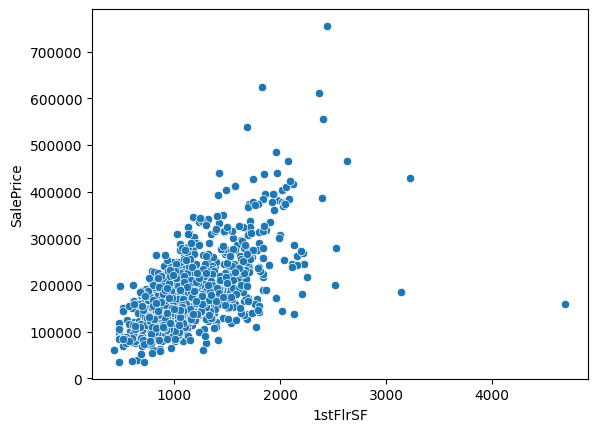

In [70]:
sns.scatterplot(data=train_df, x="1stFlrSF", y="SalePrice")

In [71]:
print("Ho : 'La surface du RDC n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = pearsonr(train_df["1stFlrSF"], train_df["SalePrice"]).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'La surface du RDC n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 9.520134839572988e-100


# 12. Analyse de YearBuilt
YearBuilt : Année de construction. Les maisons plus récentes ont tendance à se vendre à un prix plus élevé.

- 50% des maisons ont été construite entre 1953 et 2000
- La médiane est 1972
- La moyenne est 1970 avec un écart type de 30 ans
- La plus vielle date de 1872
- La plus récente date de 2010
- Le 1er quartile est très large comparé au 3eme
- l'année de construction est corrélé avec le prix de vente

In [72]:
train_df["YearBuilt"].describe().round(2)

count     944.00
mean     1971.30
std        30.01
min      1875.00
25%      1954.00
50%      1972.00
75%      2000.00
max      2010.00
Name: YearBuilt, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable YearBuilt dans ce jeu de donnée')

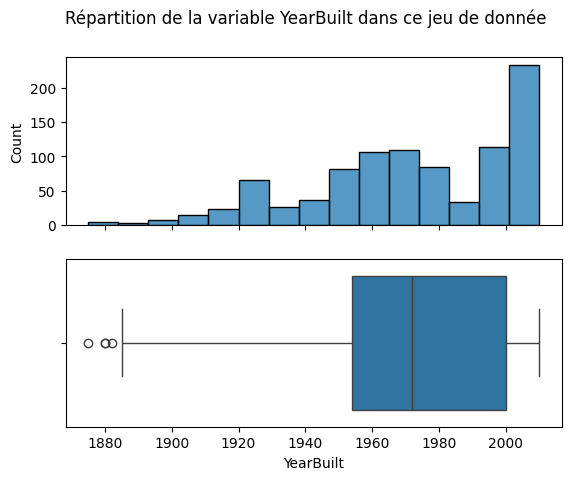

In [73]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=train_df, x="YearBuilt", ax=ax[0])
sns.boxplot(data=train_df, x="YearBuilt", ax=ax[1])
plt.suptitle("Répartition de la variable YearBuilt dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

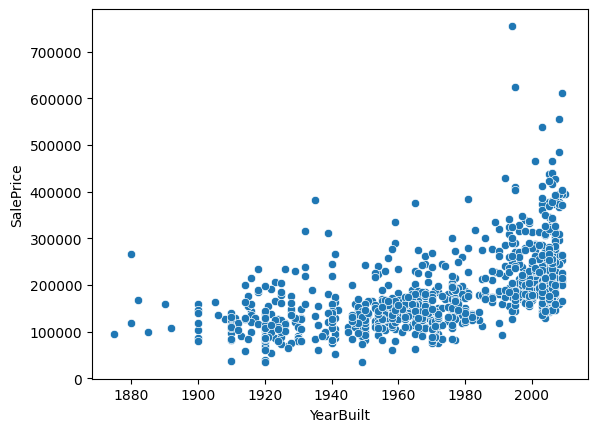

In [74]:
sns.scatterplot(data=train_df, x="YearBuilt", y="SalePrice")

In [75]:
print("Ho : 'L'année de construction n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = pearsonr(train_df["YearBuilt"], train_df["SalePrice"]).pvalue

if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
    
print(f"p_value = {p_value}")

Ho : 'L'année de construction n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 7.296806115823923e-76


# 13. Analyse de YearRemodAdd
YearRemodAdd : Année de rénovation. Les rénovations récentes peuvent augmenter le prix.

- 50% des maisons rénové l'ont été entre 1966 et 2004
- La moyenne est de 1984.51 avec un écart type de 20.78 ans
- La médiane est de 1993
- Presque 150 maisons ont été rénové en 1950
- Il y a des différences de fréquences de rénovation entre certains quartiers de la ville 
- L'année de rénovation a un impact sur le prix de ventes

In [76]:
train_df["YearRemodAdd"].describe().round(2)

count     944.00
mean     1984.98
std        20.56
min      1950.00
25%      1967.00
50%      1994.00
75%      2004.00
max      2010.00
Name: YearRemodAdd, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable YearRemodAdd dans ce jeu de donnée')

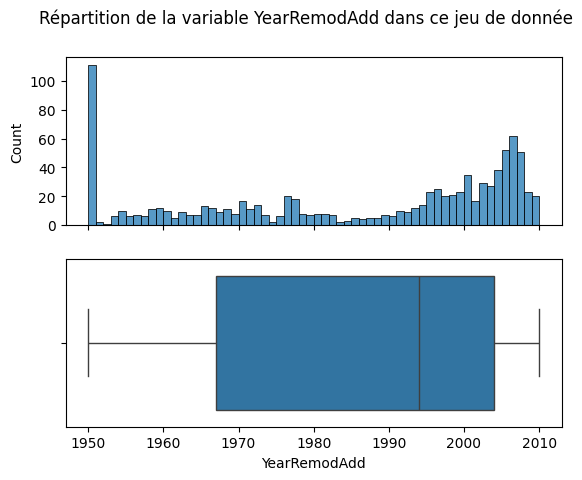

In [77]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=train_df, x="YearRemodAdd", ax=ax[0], bins=60)
sns.boxplot(data=train_df, x="YearRemodAdd", ax=ax[1])
plt.suptitle("Répartition de la variable YearRemodAdd dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

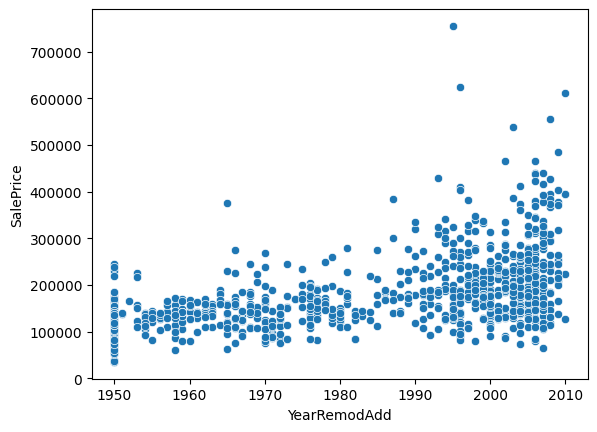

In [78]:
sns.scatterplot(data=train_df, x="YearRemodAdd", y="SalePrice")

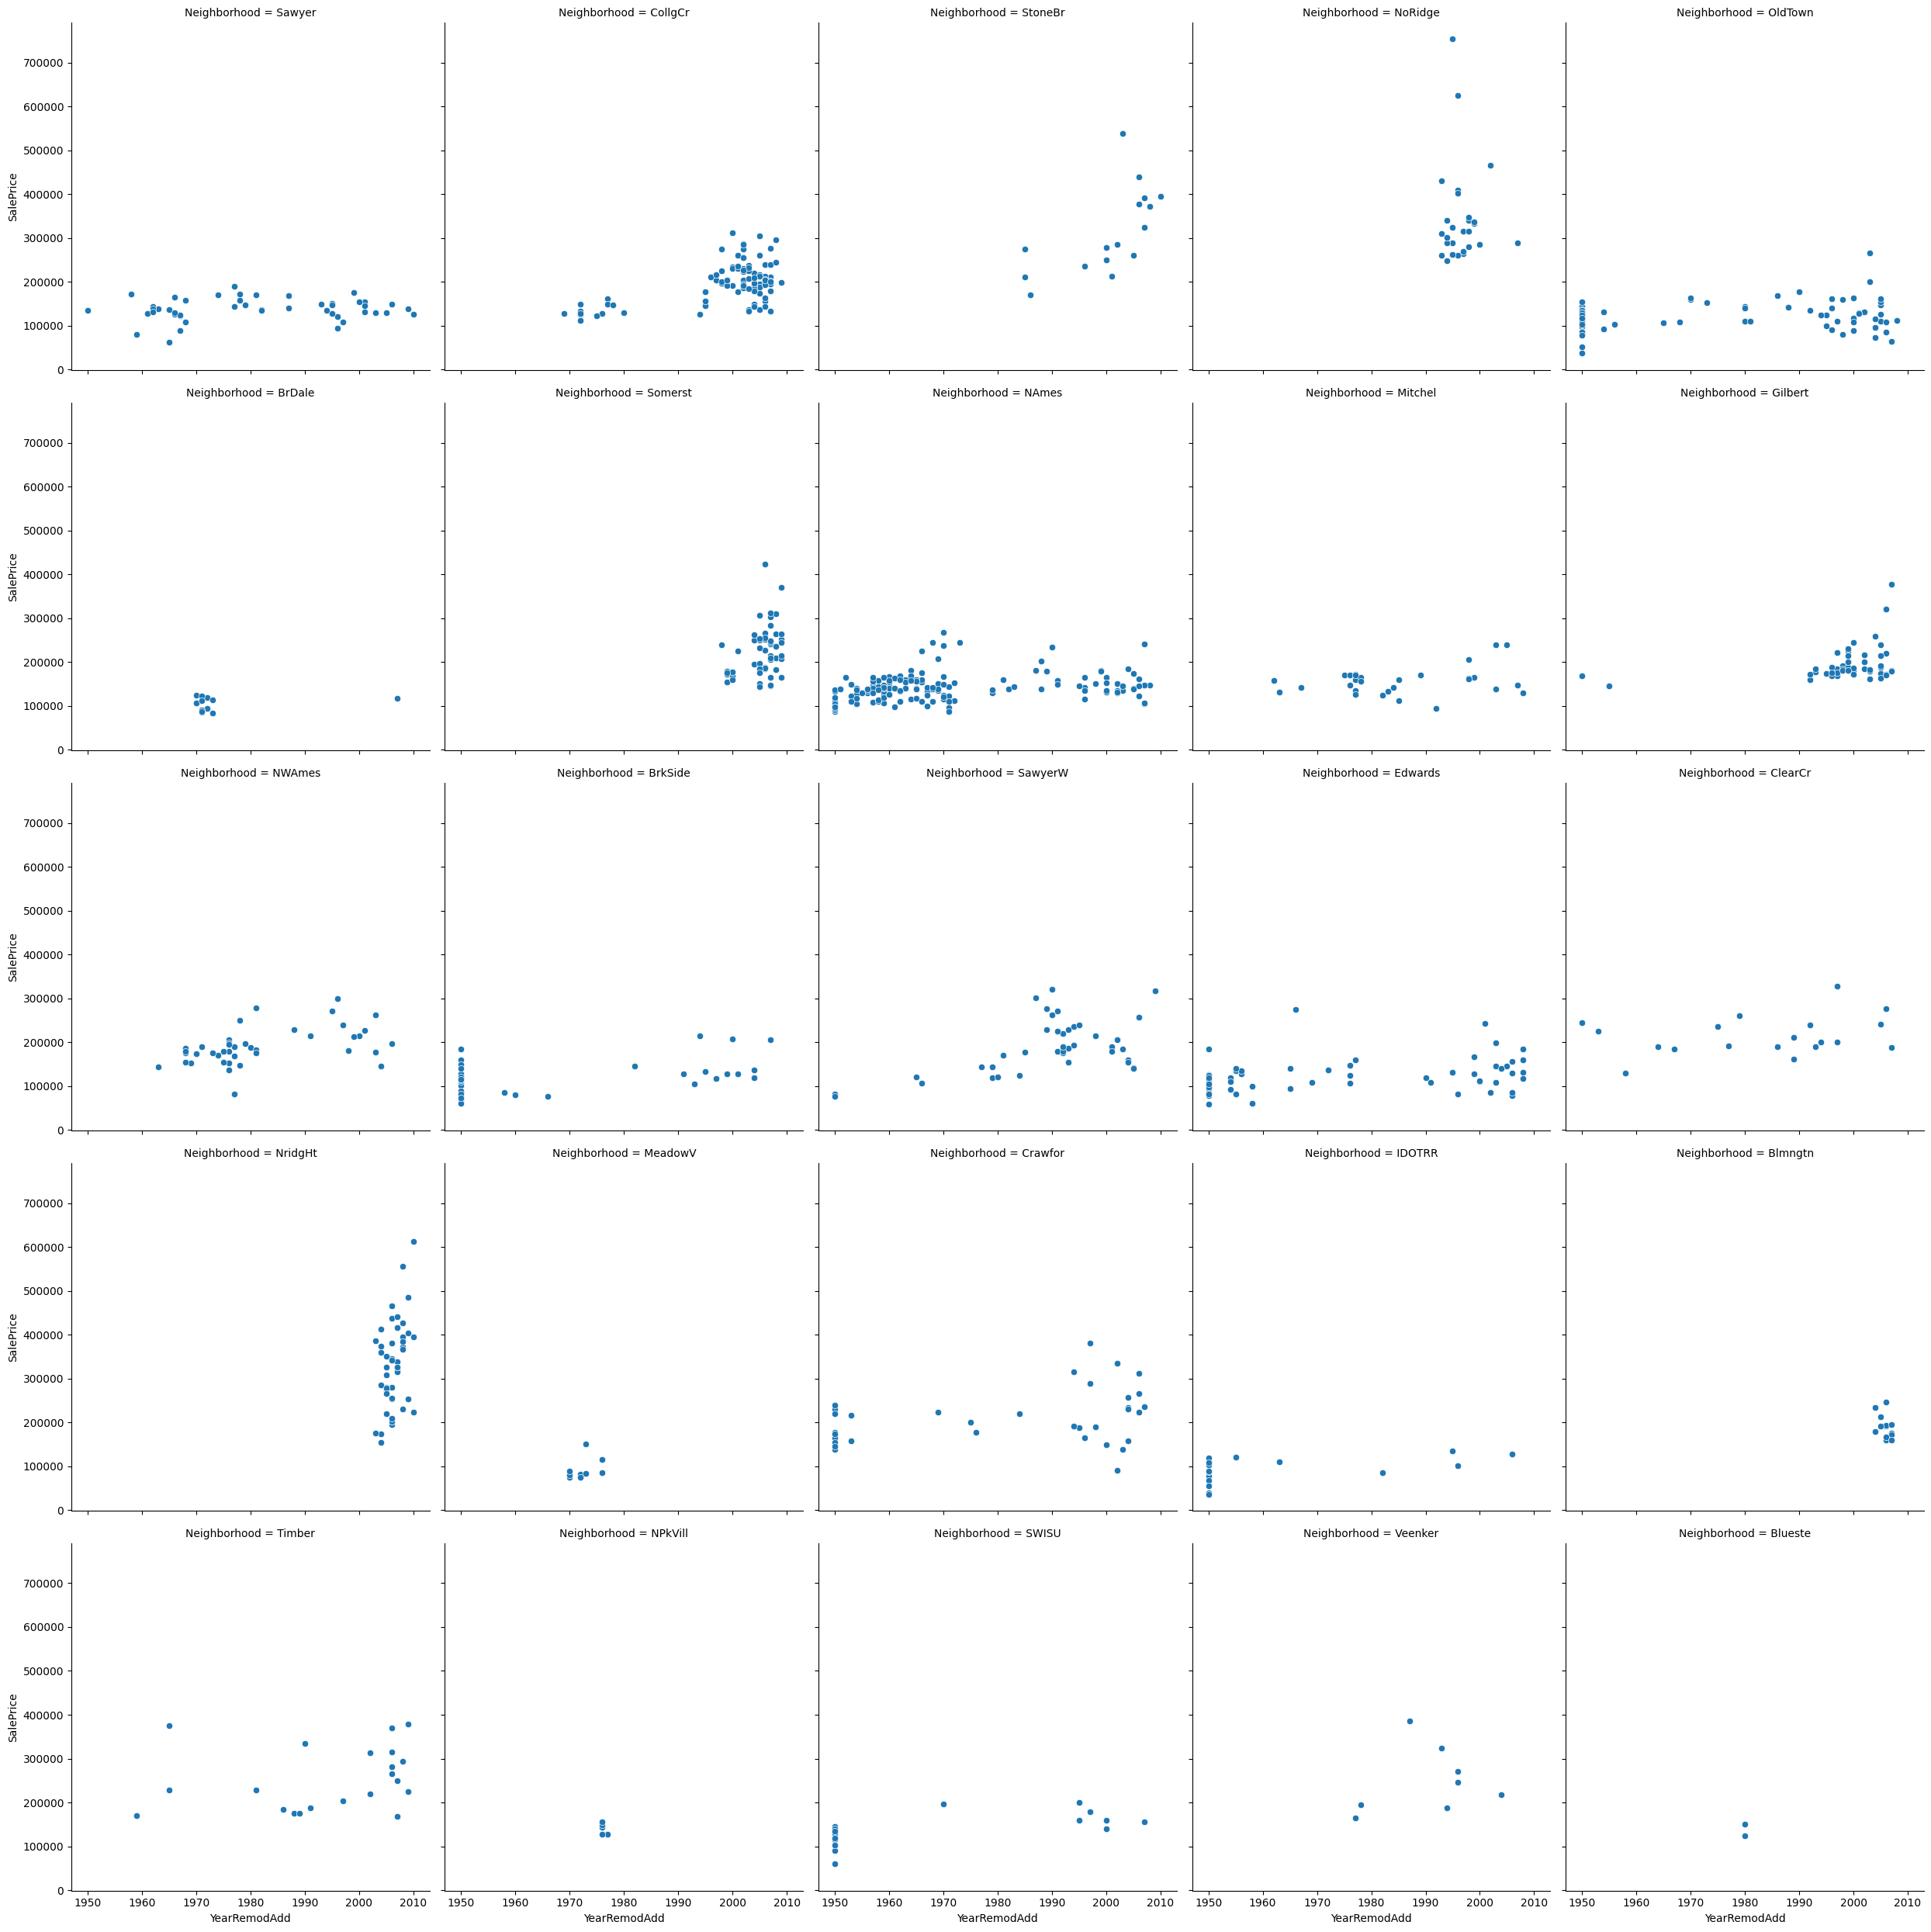

In [79]:
relplot = sns.relplot(data=train_df, x="YearRemodAdd", y="SalePrice", col="Neighborhood", col_wrap=5)

In [80]:
print("Ho : 'L'année de la dernière rénovation n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = pearsonr(train_df["YearRemodAdd"], train_df["SalePrice"]).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'L'année de la dernière rénovation n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 2.3937106786025895e-62


# 14. Analyse de GarageArea
GarageArea : Taille du garage en pieds carrés.

- 50% des de la surface de garage des maisons de ce dataset est comprise entre 312 et 576 m²
- Il y a au moins une maison sans garage
- La moyenne est de 468.94m² avec un écart type de 211.90m²
- La médiane est de 474m²
- La taille du garage des maisons a une influence sur le prix

In [81]:
train_df["GarageArea"].describe().round(2)

count     944.00
mean      471.83
std       213.38
min         0.00
25%       314.25
50%       473.00
75%       576.00
max      1418.00
Name: GarageArea, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable YearRemodAdd dans ce jeu de donnée')

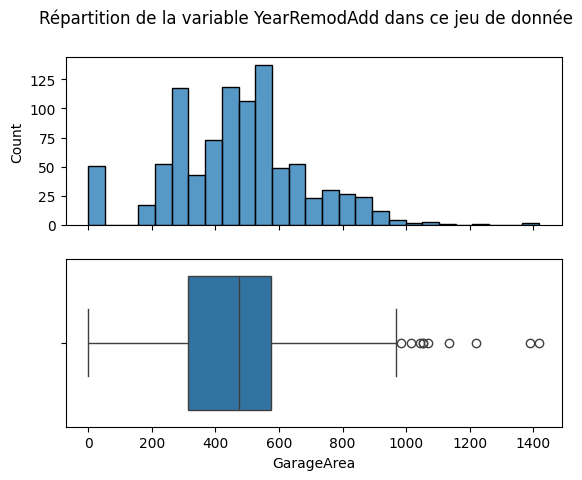

In [82]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=train_df, x="GarageArea", ax=ax[0])
sns.boxplot(data=train_df, x="GarageArea", ax=ax[1])
plt.suptitle("Répartition de la variable YearRemodAdd dans ce jeu de donnée")

# PearsonR

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

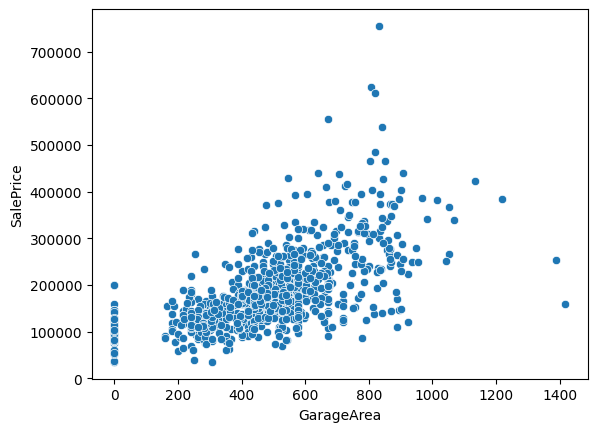

In [83]:
sns.scatterplot(data=train_df, x="GarageArea", y="SalePrice")

In [84]:
print("Ho : 'La superficie de garage n'a pas d'impact sur le prix de vente.'")
alpha = 0.02
p_value = pearsonr(train_df["GarageArea"], train_df["SalePrice"]).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'La superficie de garage n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 1.7561260208246155e-106


# 15. Analyse de LotArea
LotArea : Surface totale du terrain. La taille du lot est un facteur important, notamment dans les zones urbaines.

- 50% des maisons ont un terrain de surface compris entre 7500 et 11532.75 pied carré
- La moyenne est de 10 448.99 pied carré avec un écart type de 10266.49 pied carré
- La médiane est de 9458.50 pied carré
- Il y a 3 maisons avec plus de 150 000 pied carré de terrain
- le mini est de 1300 pied carré
- La surface de terrain à un impact sur le prix de ventes


In [85]:
train_df["LotArea"].describe().round(2)

count       944.00
mean      10533.39
std       11040.77
min        1300.00
25%        7500.00
50%        9496.00
75%       11616.00
max      215245.00
Name: LotArea, dtype: float64

Text(0.5, 0.98, 'Répartition de la variable LotArea dans ce jeu de donnée')

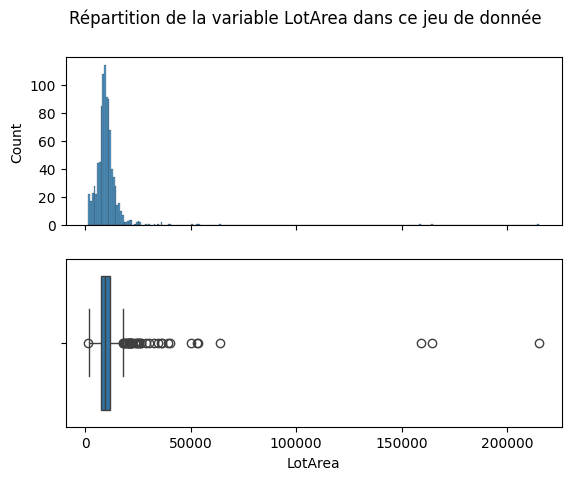

In [86]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=train_df, x="LotArea", ax=ax[0])
sns.boxplot(data=train_df, x="LotArea", ax=ax[1])
plt.suptitle("Répartition de la variable LotArea dans ce jeu de donnée")

<Axes: xlabel='LotArea', ylabel='SalePrice'>

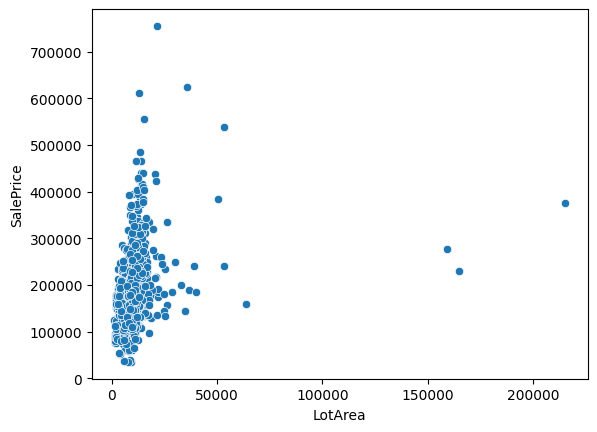

In [87]:
sns.scatterplot(data=train_df, x="LotArea", y="SalePrice")

In [88]:
print("Ho : 'La surface de terrain n'a pas d'impact sur le prix de vente.'")

alpha = 0.02
p_value = pearsonr(train_df["LotArea"], train_df["SalePrice"]).pvalue
if p_value < alpha:
    print("On rejette Ho")
else:
    print("On ne rejette pas Ho")
print(f"p_value = {p_value}")

Ho : 'La surface de terrain n'a pas d'impact sur le prix de vente.'
On rejette Ho
p_value = 5.257548626500482e-16


# Pre-processing

- Aucune valeur null

## Nettoyage des Outliers

In [89]:
q1 = df["SalePrice"].quantile(0.25)
q3 = df["SalePrice"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
#upper = q3 + 1.5 * iqr
upper = 500000

outliers_Saleprice = train_df.query("SalePrice < @lower | SalePrice > @upper")
#train_df = train_df.drop(outliers_Saleprice.index)

In [90]:
train_df.head()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,KitchenQual,Fireplaces,LotArea,Neighborhood,ExterQual,SalePrice
689,5,1701,1390,1701,1975,1981,2,611,2,6,TA,2,16647,Sawyer,TA,171000
597,7,1728,864,864,2004,2004,2,572,2,7,Gd,0,9313,CollgCr,Gd,190000
45,10,2945,1410,1426,2006,2006,3,641,3,10,Gd,1,13682,StoneBr,Ex,438780
418,7,2344,1264,1277,1996,1997,3,889,2,7,Gd,1,10208,NoRidge,Gd,265000
247,5,1118,793,793,1939,1950,2,410,1,5,TA,1,7800,OldTown,TA,119900


## ENCODING

KitchenQual, Neighborhood, ExterQual

## Normalisation

- Pas de normalisation dans un 1er temps

## MODEL

- MAE : Mean Absolute Error
- Tracer un histogramme des erreurs :
    - Calculer la différence entre prédiction et y
    - Identifier les erreurs importantes(qui dévient de votre distribution des erreurs)

In [91]:
ExterQual_order = ["Fa", "TA", "Gd", "Ex"]
KitchenQual_order = ["Fa", "TA", "Gd", "Ex"]
Neighborhood_order = df.groupby("Neighborhood")["SalePrice"].mean().sort_values().index.tolist()

encoder = OrdinalEncoder(categories=[ExterQual_order, KitchenQual_order])

In [ ]:
model = RandomForestRegressor(random_state=0)


In [93]:
preprocessor  = ColumnTransformer(
    transformers=[
        ("cat", encoder, ["ExterQual", "KitchenQual"]),
        ("cat2", OneHotEncoder(handle_unknown="ignore"), ["Neighborhood"]),
    ],
    remainder="passthrough"
)


pipeline_1 = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("scaler", MinMaxScaler()),  # ou StandardScaler()
    ("select_KBest", SelectKBest()),
    ("model", model)
])

In [94]:
X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

pipeline_1.fit(X_train, y_train)


/home/simon/projects/mlpro-regression-prix-immobilier/.venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OrdinalEncoder(categories=[['Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']]),
                                                  ['ExterQual', 'KitchenQual']),
                                                 ('cat2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood'])])),
                ('scaler', MinMaxScaler()), ('select_KBest', SelectKBest()),
                ('model', RandomForestRegressor())])

In [95]:
param_grid = {
    "model__n_estimators": [115, 120, 125],
    "model__max_depth": [None, 8, 12, 16],
    "model__min_samples_split": [2, 5],
    "select_KBest__k": [55, 60, 65],
    "model__min_samples_leaf": [1, 2, 5],
    "model__max_features": ["sqrt", 0.5, 0.8],
    "model__bootstrap": [True, False]
}


grid_search = GridSearchCV(estimator=pipeline_1, param_grid=param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur score : {grid_search.best_score_}")

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


/home/simon/projects/mlpro-regression-prix-immobilier/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=55 is greater than n_features=39. All the features will be returned.
  warnings.warn(
/home/simon/projects/mlpro-regression-prix-immobilier/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=55 is greater than n_features=39. All the features will be returned.
  warnings.warn(
/home/simon/projects/mlpro-regression-prix-immobilier/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=55 is greater than n_features=39. All the features will be returned.
  warnings.warn(
/home/simon/projects/mlpro-regression-prix-immobilier/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=60 is greater than n_features=39. All the features will be returned.
  warnings.warn(
/home/simon/proj

Meilleurs paramètres : {'model__bootstrap': False, 'model__max_depth': 12, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 120, 'select_KBest__k': 60}
Meilleur score : -18403.420850001487


In [107]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
mae_test = mean_absolute_error(y_test, y_pred)

print(f"MAE sur le test set : {mae_test:.2f}")


MAE sur le test set : 16714.53


In [108]:
predictions_train = best_model.predict(X_train)
differences_train = predictions_train - y_train

In [109]:
X_test = test_df.drop(columns=["SalePrice"])
y_test = test_df["SalePrice"]

predictions_test = best_model.predict(X_test)
differences_test = predictions_test - y_test

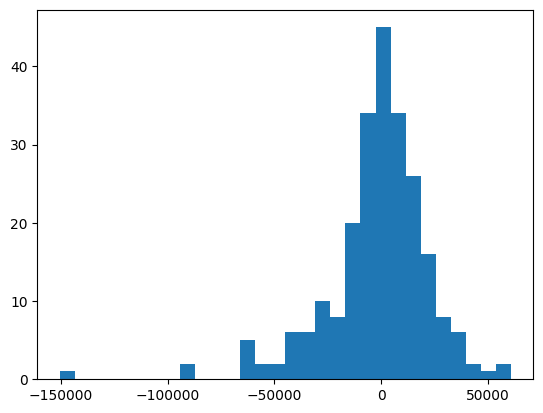

In [110]:
plt.hist(differences_test, bins=30)
plt.show()

In [100]:
mae_train = mean_absolute_error(y_true=y_train, y_pred=predictions_train)
mae_test = mean_absolute_error(y_true=y_test, y_pred=predictions_test)

print("MAE entraînement :", mae_train)
print("MAE test         :", mae_test)

MAE entraînement : 3740.200771026795
MAE test         : 16714.533488633504


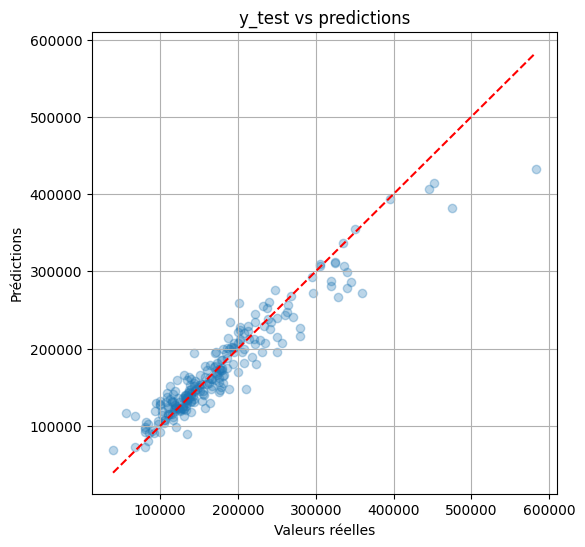

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("y_test vs predictions")
plt.grid()
plt.show()


In [111]:
X_full = df.drop(columns=["SalePrice"])
y_full = df["SalePrice"]

best_model.fit(X_full, y_full)

/home/simon/projects/mlpro-regression-prix-immobilier/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=60 is greater than n_features=39. All the features will be returned.
  warnings.warn(
/home/simon/projects/mlpro-regression-prix-immobilier/.venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OrdinalEncoder(categories=[['Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']]),
                                                  ['ExterQual', 'KitchenQual']),
                                                 ('cat2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood'])])),
                ('scaler', MinMaxScaler()), ('select_KBest', SelectKBest(k=60)),
                ('model',
                 RandomForestRegressor(bootstrap=False, max_depth=12,
                                       max_features='sqrt',
                                       n_estimators=120))])

# Kaggle Predictions

In [112]:
df_kaggle = pd.read_csv("kaggle_test_set.csv")
df_kaggle

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,KitchenQual,Fireplaces,LotArea,Neighborhood,ExterQual
0,6,1484,783,783,2005,2007,2,393,2,8,Gd,1,10237,Gilbert,Gd
1,9,1905,1905,1905,2006,2006,3,788,2,8,Ex,1,11670,Somerst,Ex
2,7,1640,798,798,2003,2003,2,595,2,6,Gd,0,7226,CollgCr,Gd
3,5,1728,1728,1728,1965,1965,2,576,2,10,TA,0,13101,NAmes,TA
4,4,864,864,864,1971,1971,2,528,1,5,TA,0,9000,NAmes,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,8,1911,777,1065,1993,1994,2,471,2,8,Gd,1,9554,SawyerW,Gd
276,7,2034,1057,1057,1997,1998,2,645,2,8,Gd,0,9375,CollgCr,TA
277,6,2119,689,1378,1972,1972,2,583,2,7,TA,1,10448,NWAmes,TA
278,5,1246,1246,1246,1959,1994,1,305,1,6,Gd,0,7500,NAmes,TA


In [113]:
X_kaggle = df_kaggle

In [115]:
predictions_kaggle = best_model.predict(X_kaggle)

In [116]:
results = pd.DataFrame({
    "ID": df_kaggle.index,
    "SalePrice": predictions_kaggle
})

results


,ID,SalePrice
0,0,178987.815230
1,1,359429.214859
2,2,192780.951256
3,3,156627.213064
4,4,116345.334533
...,...,...
275,275,216368.702195
276,276,228238.478020
277,277,182693.154422
278,278,143700.015610


In [117]:
results.to_csv("predictions.csv", index=False)